In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import warnings

# 忽略所有警告
warnings.filterwarnings("ignore")

In [2]:
# 设置中文字体（macOS 上常见中文字体）
from matplotlib import font_manager as fm

font_path = '/System/Library/Fonts/STHeiti Medium.ttc'
my_font = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = my_font.get_name()
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv('./data/aqi.csv')
data.head(3)

日期  AQI  质量等级  PM2.5含量（ppm）  PM10含量（ppm）  SO2含量（ppm）  CO含量（ppm）  \
0  2020/1/1   79     良            58           64           8        0.7   
1  2020/1/2  112  轻度污染            84           73          10        1.0   
2  2020/1/3   68     良            49           51           7        0.8   

   NO2含量（ppm）  O3_8h含量（ppm）  
0          57            23  
1          71             7  
2          49             3

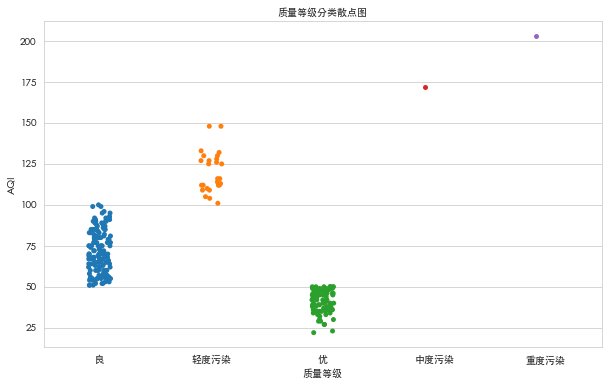

In [5]:
# 设置图形的大小为宽度 10 英寸，高度 6 英寸，方便后续展示合适大小的图形
plt.figure(figsize=(10, 6))
# 使用 seaborn 库的 stripplot 函数绘制分类散点图
# x 参数指定 x 轴的数据列名为 '质量等级'
# y 参数指定 y 轴的数据列名为 'AQI'
# data 参数指定使用的数据集为之前读取的 data
sns.stripplot(x='质量等级', y='AQI', data=data)
# 设置图形的标题为 '质量等级分类散点图'，并使用之前设置好的中文字体
plt.title('质量等级分类散点图', fontproperties=my_font)
# 设置 x 轴的标签为 '质量等级'，并使用之前设置好的中文字体
plt.xlabel('质量等级', fontproperties=my_font)
# 设置 y 轴的标签为 'AQI'，并使用之前设置好的中文字体
plt.ylabel('AQI', fontproperties=my_font)
# 显示绘制好的图形
plt.show()

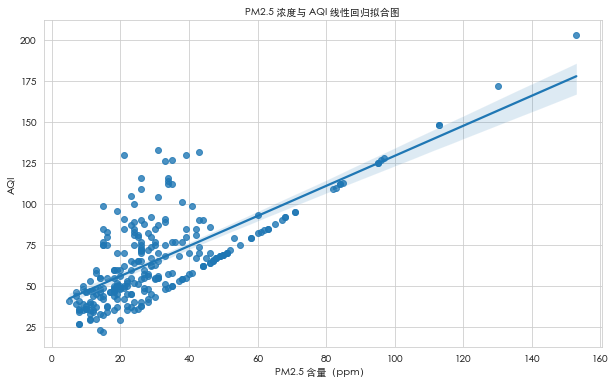

In [6]:
# 设置图形的大小为宽度 10 英寸，高度 6 英寸，便于图形的展示
plt.figure(figsize=(10, 6))
# 使用 seaborn 库的 regplot 函数绘制线性回归拟合图
# x 参数指定 x 轴的数据列名为 'PM2.5含量（ppm）'
# y 参数指定 y 轴的数据列名为 'AQI'
# data 参数指定使用的数据集为之前读取的 data
sns.regplot(x='PM2.5含量（ppm）', y='AQI', data=data)
# 设置图形的标题为 'PM2.5 浓度与 AQI 线性回归拟合图'，并使用之前设置好的中文字体
plt.title('PM2.5 浓度与 AQI 线性回归拟合图', fontproperties=my_font)
# 设置 x 轴的标签为 'PM2.5 含量（ppm）'，并使用之前设置好的中文字体
plt.xlabel('PM2.5 含量（ppm）', fontproperties=my_font)
# 设置 y 轴的标签为 'AQI'，并使用之前设置好的中文字体
plt.ylabel('AQI', fontproperties=my_font)
# 显示绘制好的图形
plt.show()

In [7]:
# 选取需要计算相关系数的列，包括 AQI 和各空气质量指标列
selected_columns = ['AQI', 'PM2.5含量（ppm）', 'PM10含量（ppm）', 'SO2含量（ppm）', 'CO含量（ppm）', 'NO2含量（ppm）',
                    'O3_8h含量（ppm）']
# 使用 pandas 的 corr() 方法计算这些列之间的相关系数
correlation = data[selected_columns].corr()
# 打印计算得到的相关系数矩阵
print(correlation)

                   AQI  PM2.5含量（ppm）  PM10含量（ppm）  SO2含量（ppm）  CO含量（ppm）  \
AQI           1.000000      0.722789     0.753629    0.481377   0.444786   
PM2.5含量（ppm）  0.722789      1.000000     0.760575    0.259824   0.519367   
PM10含量（ppm）   0.753629      0.760575     1.000000    0.623885   0.429214   
SO2含量（ppm）    0.481377      0.259824     0.623885    1.000000   0.391106   
CO含量（ppm）     0.444786      0.519367     0.429214    0.391106   1.000000   
NO2含量（ppm）    0.449114      0.489421     0.656500    0.614224   0.494028   
O3_8h含量（ppm）  0.461272     -0.123367     0.299201    0.472670  -0.065683   

              NO2含量（ppm）  O3_8h含量（ppm）  
AQI             0.449114      0.461272  
PM2.5含量（ppm）    0.489421     -0.123367  
PM10含量（ppm）     0.656500      0.299201  
SO2含量（ppm）      0.614224      0.472670  
CO含量（ppm）       0.494028     -0.065683  
NO2含量（ppm）      1.000000      0.025897  
O3_8h含量（ppm）    0.025897      1.000000  


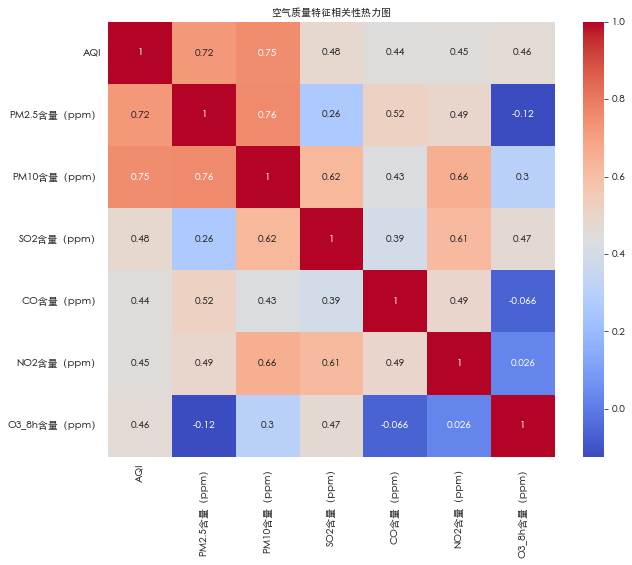

In [8]:
# 创建一个新的图形窗口，设置图形大小为宽 10 英寸，高 8 英寸
plt.figure(figsize=(10, 8))
# 使用 seaborn 库的 heatmap 函数绘制热力图
# data 参数传入之前计算得到的相关系数矩阵 correlation
# annot=True 表示在热力图上显示具体的相关系数数值
# cmap='coolwarm' 指定使用的颜色映射，这里使用冷暖色调
sns.heatmap(data=correlation, annot=True, cmap='coolwarm')
# 设置图形的标题为 '空气质量特征相关性热力图'，并使用之前设置的中文字体
plt.title('空气质量特征相关性热力图', fontproperties=my_font)
# 显示绘制好的图形
plt.show()